# TransientAnalyzer guide

This notebook shows how to use the TransientAnalyzer

In [1]:
from TransientAnalyzer import TransientAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The simulated calcium transients by [Tomek et al. 2019](https://elifesciences.org/articles/48890) model with the added noise are used as an example

In [2]:
data = np.loadtxt("Transients_SNR10.txt")
T, Ca = data[:,0], data[:,1]

The quality of the signal detection can be checked after initialization of TransientAnalyzer. Individual transients are color-coded and the onset times are displayed. We have also set the first quantile equals to 10% so that the rise and decay time are calculated as 10-90% times of the corresponding phases. There are 100 transients so the total number of transients is detected correctly.

100 transients were detected


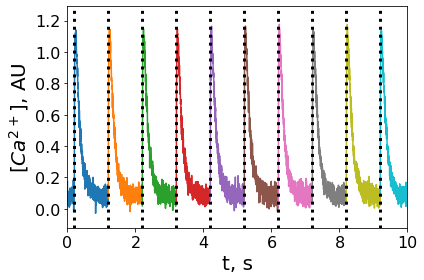

In [3]:
analyzer = TransientAnalyzer.TransientAnalyzer(T,Ca,quantile1 = 0.1)
t,ca = analyzer.GetAllExpTransients()
for i in range(len(t)):
    plt.plot(t[i] * 1e-3,ca[i])
for t_null in analyzer.t0s_est:
    plt.axvline(t_null * 1e-3,linestyle="dotted", linewidth = 3, color = 'black')
print(len(analyzer.t0s_est),"transients were detected")
plt.rcParams["font.family"] = "Arial"    
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,10)
plt.xlabel('t, s', fontsize = 20) 
plt.ylabel('$\mathit{[Ca^{2+}]}$, AU', fontsize = 20)
plt.tight_layout()
plt.show()

After the detection of all transients, approximate transients and get table with the parameters

In [4]:
analyzer.FitAllTransients()
table = analyzer.GetParametersTable()

Save parameters as excel file

In [5]:
analyzer.ParametersToExcel("params.xlsx",x_label="t, ms",y_label="$\mathit{[Ca^{2+}]}$, AU")

This part shows how to get individual transients, both experimental and approximated ones

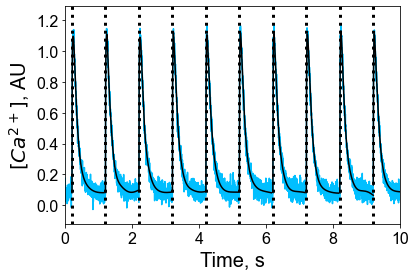

In [6]:
t,ca = analyzer.GetAllExpTransients()
for i in range(len(t)):
    T, ca_fit = analyzer.GetApproxTransient(i,1)
    plt.plot(t[i] * 1e-3,ca[i], color="deepskyblue")
    plt.plot(T * 1e-3,ca_fit, color="black")
for t_null in analyzer.t0s:
    plt.axvline(t_null * 1e-3,linestyle="dotted", linewidth = 3, color = 'black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,10)
plt.xlabel('Time, s', fontsize = 20) 
plt.ylabel('$\mathit{[Ca^{2+}]}$, AU', fontsize = 20)

plt.show()

Get the calcium and sarcomere (if provided) traces as pandas DataFrame. This dataframe can be then exported as CSV or Excel file.

In [7]:
traces = analyzer.GetTransientsTable(x_label="t, ms",y_label="$\mathit{[Ca^{2+}]}$, AU")
traces.to_excel("traces.xlsx")